# Import libraries and datasets

In [7]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [10]:
def plot_distribution(df):
    '''
    Description:
    Plot distribution charts (histograms with KDE) for all numerical features of a given Pandas DataFrame.

    Parameters: df (pd.DataFrame): The input DataFrame.

    Returns: None
    '''
    numerical_features = [col 
                          for col 
                          in df.columns 
                          if pd.api.types.is_numeric_dtype(df[col])]
    print(f'The number of numerical features is {len(numerical_features)}')
    
    # Distribution of numerical variables
    nrows = math.ceil(len(numerical_features) / 3)
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=(13, 3 * nrows))  # Adjust height for better spacing
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_features):
        sns.histplot(df[col], 
                     kde=True, 
                     ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle('Distribution plots of the dataset', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# Function to plot correlation matrix of numerical features of pandas dataframe.
def plot_correlation(df):
    '''
    Description:
    Plot a heatmap of the correlation matrix for all numerical features of a given Pandas DataFrame.

    Parameters: df (pd.DataFrame): The input DataFrame.

    Returns: None
    '''
    numerical_features = [col 
                          for col 
                          in df.columns 
                          if pd.api.types.is_numeric_dtype(df[col])]

    # Plotting the heatmap
    correlation_matrix = df[numerical_features].corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, 
                annot=False, 
                cmap='coolwarm', 
                fmt='.2f', 
                linewidths=.5)
    plt.title('Correlation Matrix')
    plt.show()

In [3]:
df_c_card = pd.read_csv('creditcard.csv')
df_c_card.info()
df_c_card.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [5]:
# Check class distribution
df_c_card['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Highly imbalanced dataset, needs to apply SMOTE

In [6]:
df_c_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

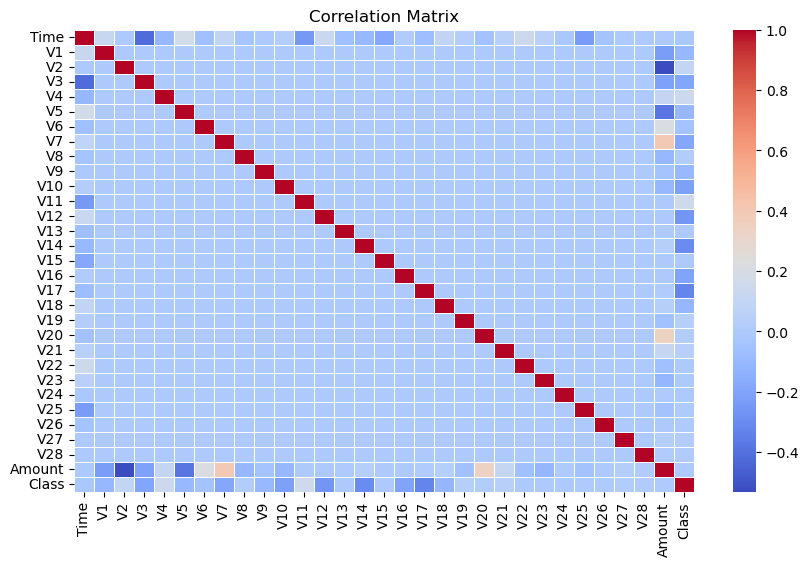

In [11]:
plot_correlation(df_c_card)

The number of numerical features is 31


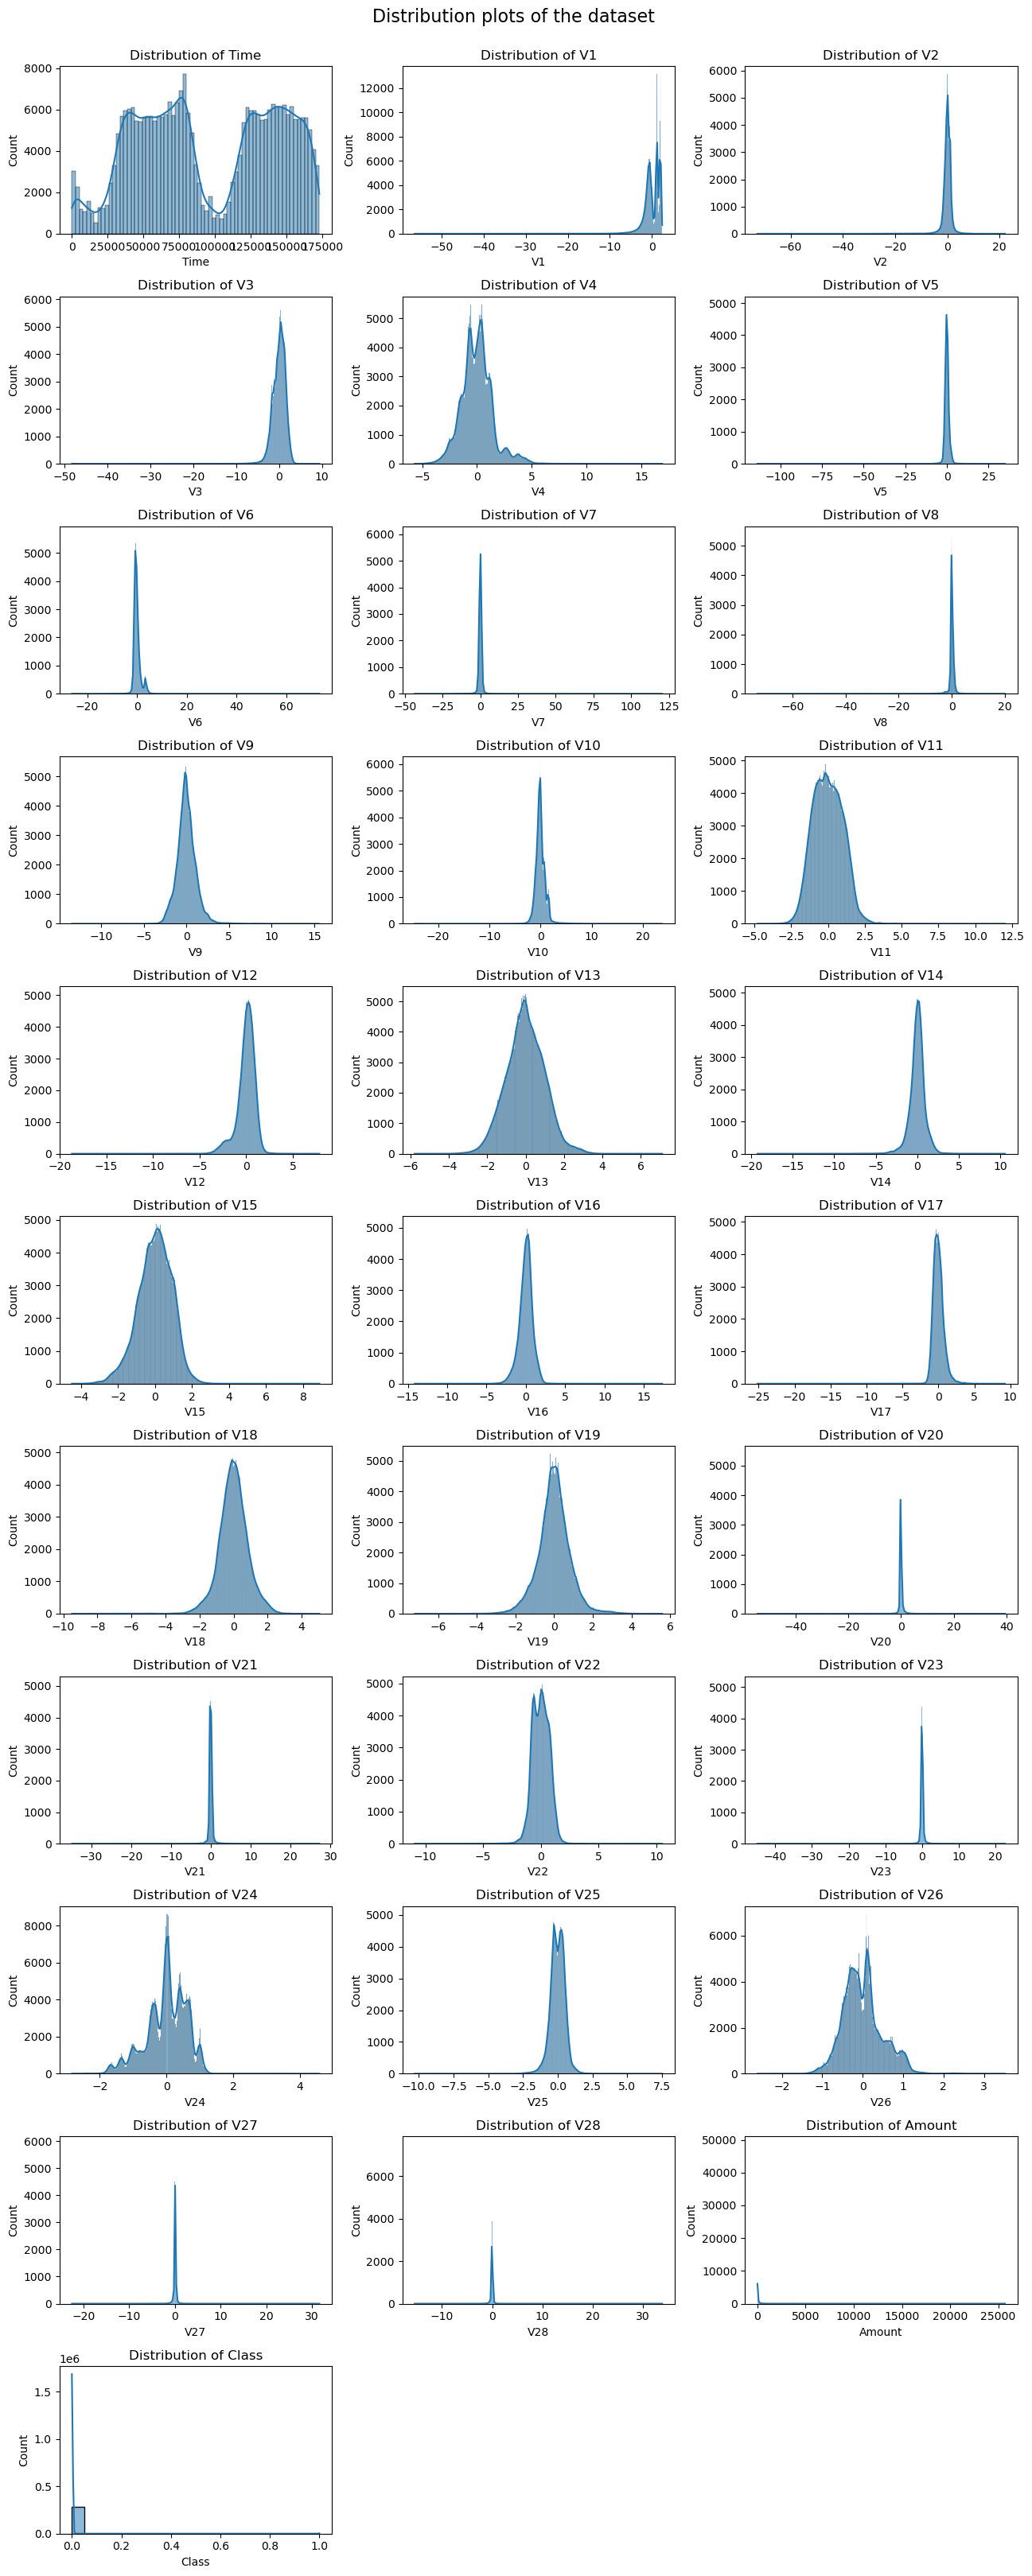

In [12]:
plot_distribution(df_c_card)

Needs to apply normalisation because of different scale of num variables

## Normalistion

In [13]:
# Normalize 'Amount' and 'Time' columns
scaler = StandardScaler()
df_c_card['scaled_amount'] = scaler.fit_transform(df_c_card[['Amount']])
df_c_card['scaled_time'] = scaler.fit_transform(df_c_card[['Time']])

# Drop the original 'Amount' and 'Time' columns
df_credit = df_c_card.drop(['Amount', 'Time'], axis=1)

# Split dataset

In [15]:
# Split data into features and target
X = df_credit.drop('Class', axis=1)
y = df_credit['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Apply SMOTE

In [16]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train LG Model

In [20]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9742635441171307
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

